In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:\Users\njhar\Downloads\train_FD001.txt', sep=" ")
test = pd.read_csv(r'C:\Users\njhar\Downloads\test_FD001.txt', sep=" ")
RUL = pd.read_csv(r'C:\Users\njhar\Downloads\RUL_FD001.txt', sep=" ")

In [3]:
train

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [4]:
test

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.00,38.86,23.3735,Unnamed: 26,Unnamed: 27
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,NaN,NaN
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,NaN,NaN
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,NaN,NaN
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,NaN,NaN


In [5]:
RUL

,112,Unnamed: 1
0,98,NaN
1,69,NaN
2,82,NaN
3,91,NaN
4,93,NaN
...,...,...
94,137,NaN
95,82,NaN
96,59,NaN
97,117,NaN


In [6]:
train.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)
test.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)
RUL.drop(columns=['Unnamed: 1'],inplace=True)

In [7]:
# This is for Train and Test data

index_names = ['engine', 'cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names= ['s1',
               's2',
               's3',
               's4',
               's5',
               's6',
               's7',
               's8',
               's9',
               's10',
               's11',
               's12',
               's13',
               's14',
               's15',
               's16',
               's17',
               's18',
               's19',
               's20',
               's21']
col_names = index_names + setting_names + sensor_names

In [8]:
# This is for Existing RUL

index_name = ['RUL']
col_name = index_name

In [9]:
# Assigning column names for the Train, Test data and RUL

In [10]:
train.columns = col_names
test.columns = col_names
RUL.columns = col_name

In [11]:
train

,engine,cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [12]:
# Train Data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,20630.0,51.509016,2.922623e+01,1.0000,26.0000,52.00000,77.0000,100.0000
cycles,20630.0,108.813088,6.887857e+01,1.0000,52.0000,104.00000,156.0000,362.0000
setting_1,20630.0,-0.000009,2.187361e-03,-0.0087,-0.0015,-0.00000,0.0015,0.0087
setting_2,20630.0,0.000002,2.930558e-04,-0.0006,-0.0002,0.00000,0.0003,0.0006
setting_3,20630.0,100.000000,0.000000e+00,100.0000,100.0000,100.00000,100.0000,100.0000
s1,20630.0,518.670000,6.537152e-11,518.6700,518.6700,518.67000,518.6700,518.6700
s2,20630.0,642.680975,5.000295e-01,641.2100,642.3300,642.64000,643.0000,644.5300
s3,20630.0,1590.523159,6.131295e+00,1571.0400,1586.2600,1590.10000,1594.3800,1616.9100
s4,20630.0,1408.934186,9.000636e+00,1382.2500,1402.3600,1408.04000,1414.5575,1441.4900
s5,20630.0,14.620000,3.394700e-12,14.6200,14.6200,14.62000,14.6200,14.6200


In [13]:
# RUL
RUL.describe()

,RUL
count,99.000000
mean,75.151515
std,41.813816
min,7.000000
25%,31.500000
50%,85.000000
75%,112.000000
max,145.000000


In [14]:
# Checking the Null values
train.isnull().sum()

engine       0
cycles       0
setting_1    0
setting_2    0
setting_3    0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
dtype: int64

In [15]:
# Dropping sensors from the Train data
train_unwanted=[]
for i in train.select_dtypes(include=np.number):
    if train[i].nunique()==1:
        train_unwanted.append(i)
print(train_unwanted)

['setting_3', 's1', 's5', 's10', 's16', 's18', 's19']


In [16]:
# Dropping sensors from the Test data
test_unwanted=[]
for i in test.select_dtypes(include=np.number):
    if test[i].nunique()==1:
        test_unwanted.append(i)
print(test_unwanted)

['setting_3', 's1', 's5', 's10', 's16', 's18', 's19']


In [17]:
# so we will drop such columns
train.drop(columns=train_unwanted, inplace=True)
test.drop(columns=test_unwanted, inplace=True)

In [18]:
train.shape

(20630, 19)

In [19]:
test.shape

(13095, 19)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
train.iloc[:,2:19] = scaler.fit_transform(train.iloc[:,2:19])

In [22]:
test.iloc[:,2:19] = scaler.transform(test.iloc[:,2:19])

In [23]:
test.head()

,engine,cycles,setting_1,setting_2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
1,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
2,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
3,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377
4,1,6,0.568966,0.750000,0.271084,0.176150,0.217421,1.0,0.703704,0.151515,0.131159,0.244048,0.688699,0.294118,0.142017,0.380531,0.333333,0.596899,0.624827


# Finding Remaining Useful Life ( RUL )

In [24]:
test['cycles'].max()

303

In [25]:
data_test_RUL = test.groupby(['engine']).agg({'cycles':'max'})
data_test_RUL.rename(columns={'cycles':'life'},inplace=True)
data_test_RUL.head()

,life
engine,
1,31
2,49
3,126
4,106
5,98


In [26]:
test = test.merge(data_test_RUL,how='left',on=['engine'])

In [27]:
test['RUL'] = test['life'] - test['cycles']
test.drop(['life'],axis=1,inplace=True)

In [28]:
test.head()

,engine,cycles,setting_1,setting_2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827,29
1,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348,28
2,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110,27
3,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377,26
4,1,6,0.568966,0.750000,0.271084,0.176150,0.217421,1.0,0.703704,0.151515,0.131159,0.244048,0.688699,0.294118,0.142017,0.380531,0.333333,0.596899,0.624827,25


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from keras.callbacks import EarlyStopping

ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [ ]:
# Step 1: Preprocessing the data

# Separate features (X) and target (RUL)
X = test.drop(['RUL'], axis=1).values  # Features
y = test['RUL'].values  # Target (RUL)

In [ ]:
# Normalize the data using MinMaxScaler (LSTMs often benefit from normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Normalize the target (RUL) using a separate MinMaxScaler
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [33]:
# Reshape X into 3D for LSTM (samples, timesteps, features)
# For simplicity, we assume a timestep of 10 cycles. You can adjust based on your data.
timesteps = 50
X_reshaped = []

In [34]:
# Loop through data to create sequences
for i in range(len(X_scaled) - timesteps):
    X_reshaped.append(X_scaled[i:i + timesteps])

In [35]:
# Convert to numpy array
X_reshaped = np.array(X_reshaped)

In [36]:
# Adjust y to match the reshaped X (drop first `timesteps` values)
y_scaled = y_scaled[timesteps:]

In [37]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

In [38]:
# Step 2: Building the LSTM Model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Regularization

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer with 'relu' activation to ensure positive predictions
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# model summary
model.summary()

C:\Users\njhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 100)        │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,251 (305.67 KB)

 Trainable params: 78,251 (305.67 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Step 3: Training the model
#history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test), verbose=2)
# fit the network
model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.05, verbose=2,
          callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Epoch 1/20
100/100 - 27s - 273ms/step - accuracy: 0.0080 - loss: 0.0279 - val_accuracy: 0.0096 - val_loss: 0.0271
Epoch 2/20
100/100 - 17s - 167ms/step - accuracy: 0.0080 - loss: 0.0229 - val_accuracy: 0.0096 - val_loss: 0.0244
Epoch 3/20
100/100 - 17s - 169ms/step - accuracy: 0.0080 - loss: 0.0222 - val_accuracy: 0.0096 - val_loss: 0.0246


In [40]:
# Step 4: Predict on the test set
y_pred_scaled = model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


In [41]:
# Step 5: Inverse scaling of predictions (for y)
y_pred_rescaled = scaler_y.inverse_transform(y_pred_scaled)

In [42]:
# Display the first 10 predictions
print(y_pred_rescaled[:10])

[[ 85.95564 ]
 [104.04125 ]
 [ 86.00725 ]
 [ 58.48006 ]
 [ 32.199387]
 [130.47174 ]
 [ 96.28838 ]
 [ 59.750973]
 [ 98.54941 ]
 [ 85.0056  ]]


In [43]:
# Print shapes for debugging
print(f"Shape of X_test: {X_test.shape}")
print(f"Length of y_pred_rescaled: {len(y_pred_rescaled)}")

Shape of X_test: (2609, 50, 19)
Length of y_pred_rescaled: 2609


In [44]:
import numpy as np

# Function to calculate failure probability using exponential distribution
def failure_probability(rul_pred, time_period):
    return 1 - np.exp(-time_period / rul_pred)

# Assuming you have predicted RUL from the LSTM model:
# 'y_pred_rescaled' is the predicted RUL values in the original scale
# 'time_period' is the period over which you want to calculate failure probability (e.g., 30 days)

time_period = 30  # days

# Ensure no division by zero or negative values by applying a minimum threshold to RUL predictions
y_pred_rescaled = np.clip(y_pred_rescaled, a_min=1, a_max=None)

# Calculate failure probability for the next 30 days
failure_probs = failure_probability(y_pred_rescaled, time_period)

# First, reshape the X_test array into a flat format if necessary, and ensure it's a DataFrame
X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))  # Reshape X_test to 2D

# Now, ensure that y_pred_rescaled is properly flattened and reshaped
y_pred_rescaled = np.round(y_pred_rescaled.flatten())  # Ensure it's 1D

# Ensure the length of y_pred_rescaled and X_test_flat match
if len(y_pred_rescaled) == X_test.shape[0]:
    X_test['predicted_RUL'] = y_pred_rescaled
else:
    print(f"Shape mismatch: len(y_pred_rescaled) = {len(y_pred_rescaled)}, X_test_flat rows = {X_test.shape[0]}")
    
# Calculate failure probability (assuming it's already a 1D array and properly shaped)
failure_probs = np.round(failure_probs.flatten(), decimals=4)  # Ensure it's 1D and round

# Add the failure probability to the DataFrame
X_test['failure_prob_30_days'] = failure_probs

In [45]:
# Display the first few rows to verify
print(X_test.head())

          0         1        2         3         4         5         6    7  \
0  0.878788  0.033113  0.46875  0.153846  0.422713  0.560374  0.416990  1.0   
1  0.191919  0.513245  0.37500  0.153846  0.574132  0.655414  0.607923  1.0   
2  0.262626  0.023179  0.61250  0.692308  0.334385  0.295767  0.202777  1.0   
3  0.303030  0.168874  0.61875  0.461538  0.302839  0.498572  0.354707  1.0   
4  0.757576  0.423841  0.32500  0.230769  0.331230  0.339392  0.402287  1.0   

          8         9  ...       942       943       944       945       946  \
0  0.461694  0.463415  ...  0.493151  0.381279  0.534884  0.156635  0.555609   
1  0.217742  0.634146  ...  0.383562  0.673516  0.372093  0.243347  0.355225   
2  0.796371  0.292683  ...  0.280822  0.575342  0.279070  0.255849  0.283317   
3  0.681452  0.365854  ...  0.438356  0.582192  0.162791  0.397214  0.419942   
4  0.685484  0.317073  ...  0.732877  0.347032  0.511628  0.478389  0.717162   

     947       948       949  predicted_RUL 

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test contains the true values and y_pred contains predictions from your LSTM model

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rescaled)
mae = mean_absolute_error(y_test, y_pred_rescaled)
r2 = r2_score(y_test, y_pred_rescaled)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5834.8356
Mean Absolute Error: 71.9891
R-squared: -189335.17


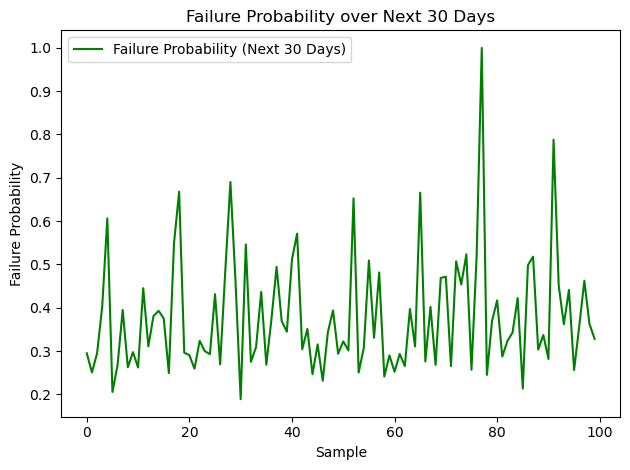

In [47]:
# Plot failure probability over the next 30 days

plt.plot(failure_probs[:100], label='Failure Probability (Next 30 Days)', color='green')
plt.title('Failure Probability over Next 30 Days')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Failure Probability')

plt.tight_layout()
plt.show()

In [48]:
# Define thresholds for making maintenance decisions
immediate_maintenance_threshold = 0.7  # Engines with high failure probability
monitoring_threshold = 0.3  # Engines with low failure probability

# Add a new column for maintenance decision
X_test['maintenance_decision'] = np.where(
    X_test['failure_prob_30_days'] > immediate_maintenance_threshold,
    'Immediate Maintenance',
    np.where(X_test['failure_prob_30_days'] < monitoring_threshold, 'Monitor', 'Continue Operation')
)

# Display rows with maintenance decision
print(X_test[['predicted_RUL', 'failure_prob_30_days', 'maintenance_decision']].head())

   predicted_RUL  failure_prob_30_days maintenance_decision
0           86.0                0.2946              Monitor
1          104.0                0.2505              Monitor
2           86.0                0.2945              Monitor
3           58.0                0.4013   Continue Operation
4           32.0                0.6061   Continue Operation


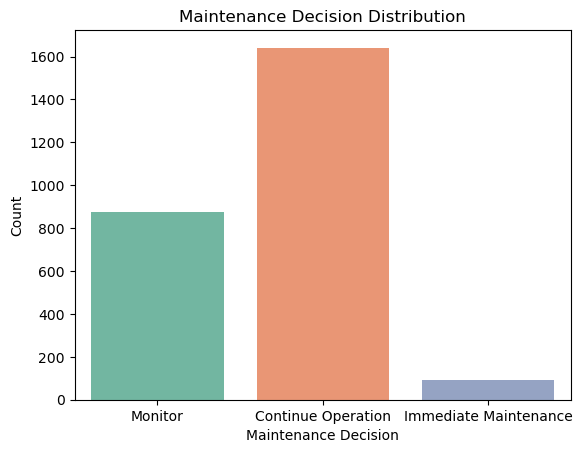

In [49]:
# Plot 3: Maintenance decision distribution
sns.countplot(x='maintenance_decision', data=X_test, palette="Set2")
plt.title('Maintenance Decision Distribution')
plt.ylabel('Count')
plt.xlabel('Maintenance Decision')
plt.show()

In [50]:
model.save('trained_model.keras')

In [51]:
from tensorflow.keras.models import load_model

# Load the saved model
#model = load_model('trained_model.h5')

# Recompile the model if you intend to retrain or evaluate
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])  # Add your metrics here

# You can now evaluate or retrain the model without warnings
# Example: model.evaluate or model.fit

model = load_model('trained_model.keras')

In [52]:
from tkinter import filedialog, messagebox
def load_trained_model():
    global model
    try:
        model = load_model('trained_model.keras')  # Load the model
        messagebox.showinfo("Model Loaded", "The predictive maintenance model has been loaded successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"Failed to load model: {str(e)}")

In [53]:
load_trained_model()

In [58]:
import tkinter as tk
from tkinter import filedialog, messagebox, scrolledtext
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to calculate failure probability
def failure_probability(rul_pred, time_period):
    epsilon = 1e-10  # Small value to avoid division by zero
    rul_pred_safe = np.where(rul_pred == 0, epsilon, rul_pred)  # Replace zero values with epsilon
    return 1 - np.exp(-time_period / rul_pred_safe)

# Function to make maintenance decision based on failure probability
def make_maintenance_decision(failure_prob):
    if failure_prob > 0.7:
        return 'Immediate Maintenance'
    elif failure_prob > 0.4:
        return 'Monitor'
    else:
        return 'Continue Operation'

# Function to load model
def load_trained_model():
    global model, scaler
    try:
        model = load_model('trained_model.keras')  # Replace with the path to your trained model
        # Assuming you have previously fitted a scaler on training data and saved it
        scaler = MinMaxScaler(feature_range=(0, 1))  # Placeholder for scaler
        messagebox.showinfo("Model Loaded", "The predictive maintenance model has been loaded successfully.")
    except Exception as e:
        messagebox.showerror("Error", f"Could not load model: {str(e)}")

# Function to plot RUL predictions
def plot_rul(engine_ids, predicted_rul):

    plt.bar(engine_ids, predicted_rul, color='skyblue')
    plt.xlabel('Engine ID')
    plt.ylabel('Predicted RUL')
    plt.title('Predicted Remaining Useful Life (RUL) for Engines')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Function to preprocess data, make predictions, and display results
def test_new_data():
    try:
        file_path = filedialog.askopenfilename()
        if not file_path:
            return

        # Load the new data
        new_data = pd.read_csv(file_path)

        # Preprocess the new data (replace 'RUL' with your target column)
        if 'RUL' not in new_data.columns:
            messagebox.showerror("Error", "The input data must contain 'RUL' column.")
            return

        # Drop 'RUL' for features
        X_new = new_data.drop(['RUL'], axis=1).values
        engine_ids = new_data['engine'].values  # Store engine IDs for display
        cycles = new_data['cycles'].values  # Store cycles for display
        
        # Normalize the new data
        X_new_scaled = scaler.fit_transform(X_new)  # This fits the scaler, replace if you have a saved one

        # Reshape the data for LSTM (assuming timesteps=10)
        timesteps = 50
        
        # Prepare the reshaped input for LSTM
        X_new_reshaped = []
        for i in range(len(X_new_scaled) - timesteps):
            X_new_reshaped.append(X_new_scaled[i:i + timesteps])

        X_new_reshaped = np.array(X_new_reshaped)

        # Reshape to (samples, timesteps, features)
        num_features = X_new_scaled.shape[1]
        X_new_reshaped = X_new_reshaped.reshape((X_new_reshaped.shape[0], timesteps, num_features))

        # Predict the RUL for new data
        y_new_pred = model.predict(X_new_reshaped)

        # Check the shape of y_new_pred
        if y_new_pred.shape[1] == 1:
            y_new_pred_rescaled = y_new_pred.flatten()
        else:
            y_new_pred_rescaled = y_new_pred  # Assuming it's already the correct shape

        # Calculate failure probabilities for the next 30 days
        time_period = 30  # 30 days
        failure_probs_new = failure_probability(y_new_pred_rescaled, time_period)

        # Make maintenance decisions
        maintenance_decisions_new = [make_maintenance_decision(prob) for prob in failure_probs_new]

        # Create a new DataFrame with the results
        results_df = pd.DataFrame({
            'Engine ID': engine_ids[:len(y_new_pred_rescaled)],
            'Cycles': cycles[:len(y_new_pred_rescaled)],
            'Predicted RUL': np.round(y_new_pred_rescaled, 2),
            'Failure Probability (30 days)': np.round(failure_probs_new, 2),
            'Maintenance Decision': maintenance_decisions_new
        })

        # Display the results in a new window
        result_window = tk.Toplevel(root)
        result_window.title("Maintenance Scheduling Results")
        result_window.geometry("800x600")
        result_window.configure(bg="#f0f0f0")

        text_area = scrolledtext.ScrolledText(result_window, wrap=tk.WORD, height=15, width=90, bg="#e6f7ff", font=("Arial", 12))
        text_area.insert(tk.END, str(results_df.head(10)))  # Show first 10 rows
        text_area.pack(pady=10)

        # Plot the RUL predictions
        plot_rul(results_df['Engine ID'], results_df['Predicted RUL'])

        # Create a canvas for the plot
        figure_canvas = FigureCanvasTkAgg(plt.gcf(), master=result_window)
        figure_canvas.draw()
        figure_canvas.get_tk_widget().pack(pady=20)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Initialize the main window
root = tk.Tk()
root.title("Predictive Maintenance Decision Support")
root.geometry("500x400")
root.configure(bg="#f0f0f0")

# Add a title label
title_label = tk.Label(root, text="Predictive Maintenance Decision Support", bg="#f0f0f0", font=("Arial", 16, "bold"))
title_label.pack(pady=20)

# Add buttons
load_model_button = tk.Button(root, text="Load Predictive Model", command=load_trained_model, bg="#4CAF50", fg="white", font=("Arial", 12))
load_model_button.pack(pady=10)

test_data_button = tk.Button(root, text="Test New Data", command=test_new_data, bg="#2196F3", fg="white", font=("Arial", 12))
test_data_button.pack(pady=10)

# Run the Tkinter main loop
root.mainloop()


257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
